## <center> Machine learning project about predicting the weather in Australia
#### <center> 18-08-2022, Mateusz Kubita

In this machine learning project I will try to predict if it will rain or not for the tommorow day. The data comes from the kaggle.com website. In order to train the model accurately, I will follow the following steps of building a machine learning model:
1. Defining the problem and gathering the data
2. Preparing the data
3. Initial data exploration
4. Data pre-processing
5. Training the model 
6. Model comparison


#  1. Defining the problem and gathering the data

The dataset contains about 10 years of daily weather observations. The target variable is RainTomorrow. The problem that I will try to answer is to predict wheather it will rain in the tomorrow day or not. This is a classification (binary) problem.

# 2. Preparing the data

In [2]:
# --- Libraries

# --- Data Processing
import pandas as pd
import numpy as np

# --- Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import mglearn
import seaborn as sns

# --- Normalization
from sklearn.preprocessing import MinMaxScaler

# --- Models
from sklearn.utils._testing import ignore_warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# -- Encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

In [4]:
# load the data
weather_df = pd.read_csv(r"C:\Users\Uzytkownik\Desktop\datasets\weatherAUS.csv")

In [5]:
# meet the data
weather_df.shape

(145460, 23)

In [6]:
weather_df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


1. The location variable is nominal datatype 
2. The MinTemp, MaxTemp, RainFall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity 3pm,
    Humidity 9am, Pressure9am, Pressure 3pm, Cloud 9am, Cloud 3pm, Temp9am, Temp3pm are continuous quantitative datatypes.
3. The WindGustDir, WindDir9am, WindDir3pm, are also nominal datatypes - they must be encoded.
4. RainToday is nominal, but we will code it numerically (0 - no, 1 yes)
5. The RainTomorrow variable is the one that I will try to predict. The variable is nominal, but we can code it numerically,
    (0 - no, 1 yes)

In [7]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#check the % of missing values for each column
weather_df.isna().sum() * 100 / len(weather_df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [9]:
# Let us delete the columns with more than 15% of missing values 
features_delete = ["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]
weather_df.drop(features_delete, axis = 1,inplace = True)
weather_df.shape

(145460, 19)

In [10]:
# let us complete missing Pressure9am and Pressure3pm with median
features_median = ["Pressure9am", "Pressure3pm", "WindGustSpeed"]

for feat_med in features_median:
    weather_df[feat_med].fillna(weather_df[feat_med].median(), inplace = True)

weather_df.isna().sum() * 100 / len(weather_df)

Date             0.000000
Location         0.000000
MinTemp          1.020899
MaxTemp          0.866905
Rainfall         2.241853
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     1.214767
WindSpeed3pm     2.105046
Humidity9am      1.824557
Humidity3pm      3.098446
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          1.214767
Temp3pm          2.481094
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [11]:
# let us complete missing WindGustDir, WindGustSpeed and WindDir9am with mode

features_mode = ["WindGustDir","WindDir3pm", "WindDir9am"]

for feat_mod in features_mode:
    weather_df[feat_mod].fillna(weather_df[feat_mod].mode()[0], inplace = True)
    
#delete records if there is a null value 
weather_df.dropna(axis = 0, inplace = True)


weather_df.isna().sum() * 100 / len(weather_df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [12]:
weather_df.shape

(135643, 19)

In [13]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


# 3. Initial data exploration

#  1. Location

*****************
.: Location  :.
*****************


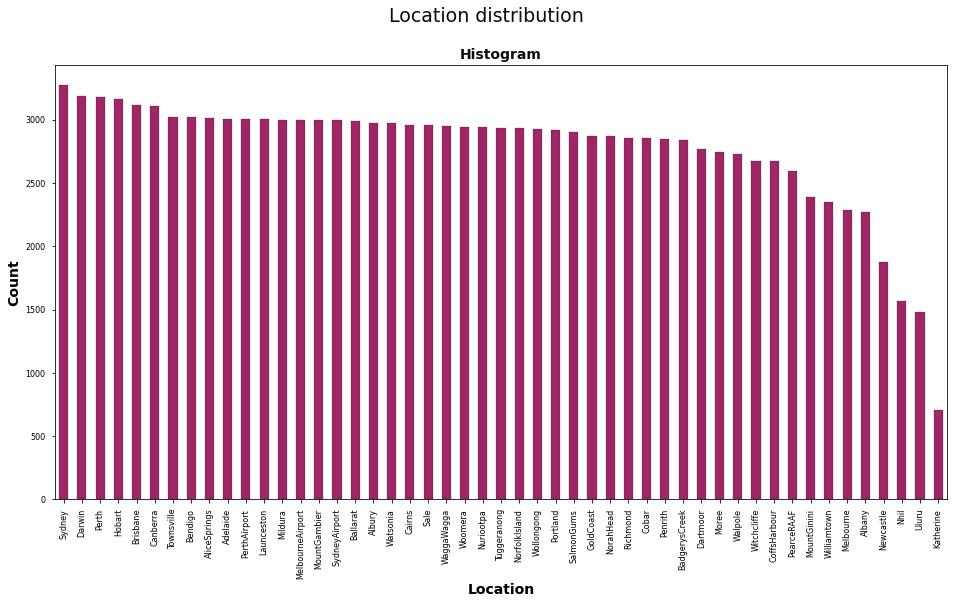

In [14]:
# --- Histogram 
plt.figure(figsize = (16,8))
plt.title("Histogram", fontweight = "bold", fontsize = 14, fontfamily = "sans-serif", color = black_grad[0])
plt.suptitle("Location distribution", fontfamily = "sans-serif", fontsize = '19', color = black_grad[0])
plt.xlabel("Location", fontweight = 'bold', fontsize = 14, fontfamily = "sans-serif")
plt.ylabel("Count", fontweight = 'bold', fontsize = 14, fontfamily = "sans-serif")
weather_df["Location"].value_counts().plot.bar(edgecolor = black_grad[0], alpha = 0.85, color = purple_grad[2])

print("*" * 17)
print('\033[1m'+'.: Location  :.' +'\033[0m')
print("*" * 17)

# 2. RainTomorrow

In [15]:
label = LabelEncoder()
weather_df["RainTomorrow"] = label.fit_transform(weather_df["RainTomorrow"])
weather_df["RainTomorrow"].unique()

array([0, 1])

********************
.: RainTomorrow  :.
********************


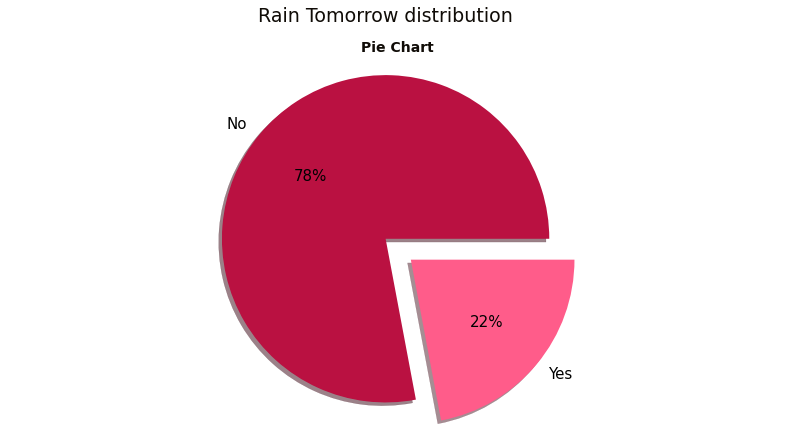

In [16]:
# --- Pie Chart
plt.figure(figsize = (14,7))
plt.title("Pie Chart", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.suptitle("Rain Tomorrow distribution", fontfamily = "sans-serif", fontsize = '19', color = black_grad[0])
plt.pie(weather_df["RainTomorrow"].value_counts(), labels = ["No", "Yes"], colors = pink_grad[1:3],
        autopct ="%1.0f%%", shadow = True, explode = (0.1,0.1), textprops = {"fontsize": 15} )
plt.axis("equal")

print("*" * 20)
print('\033[1m'+'.: RainTomorrow  :.' +'\033[0m')
print("*" * 20)

# 3. RainToday

********************
.: RainToday  :.
********************


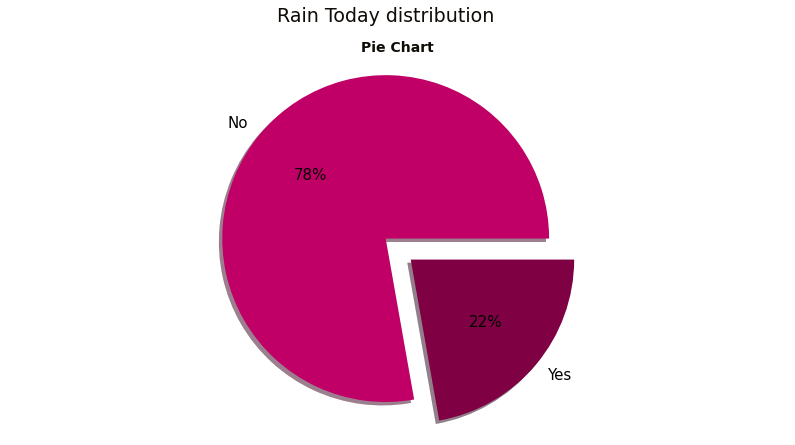

In [17]:
# --- Pie Chart
plt.figure(figsize = (14,7))
plt.title("Pie Chart", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.suptitle("Rain Today distribution", fontfamily = "sans-serif", fontsize = '19', color = black_grad[0])
plt.pie(weather_df["RainToday"].value_counts(), labels = ["No", "Yes"], colors = [purple_grad[4], purple_grad[1]],
        autopct ="%1.0f%%", shadow = True, explode = (0.1,0.1), textprops = {"fontsize": 15} )
plt.axis("equal")

print("*" * 20)
print('\033[1m'+'.: RainToday  :.' +'\033[0m')
print("*" * 20)

# Numerical variable
# 4. MinTemp

***************
.: MinTemp :.
***************


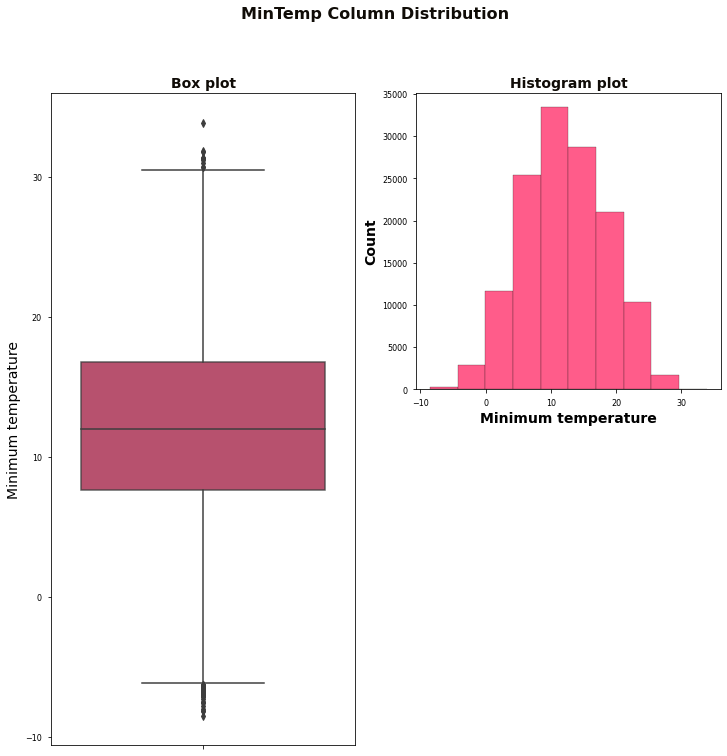

In [18]:
# --- figure
fig = plt.figure(figsize = (12,12))
fig.suptitle('MinTemp Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Histogram
ax_1 = fig.add_subplot(2,2,2)

plt.hist(weather_df["MinTemp"], edgecolor = black_grad[0], color = pink_grad[2])
plt.title("Histogram plot", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.xlabel("Minimum temperature", fontsize = 14, fontweight ="bold", fontfamily = "sans-serif")
plt.ylabel("Count", fontsize = 14, fontweight = "bold", fontfamily = "sans-serif")

# --- Boxplot
ax_2 = fig.add_subplot(1,2,1)
sns.boxplot(data=weather_df, y=weather_df["MinTemp"], boxprops=dict(alpha=0.8), linewidth=1.5,
           color = pink_grad[1])
plt.title("Box plot", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.ylabel("Minimum temperature", fontsize = 14)


print("*" * 15)
print('\033[1m'+'.: MinTemp :.' +'\033[0m')
print("*" * 15)

# 5. MaxTemp

***************
.: MaxTemp :.
***************


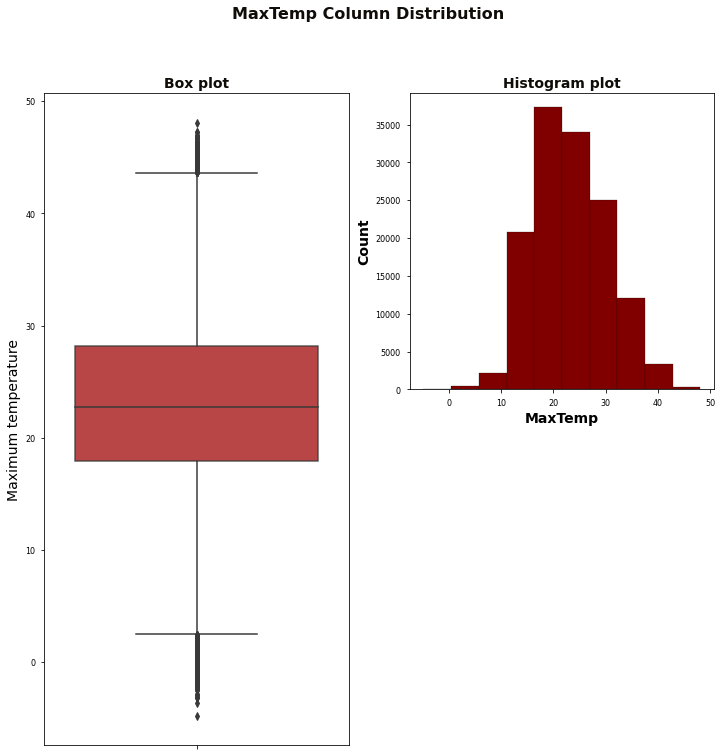

In [19]:
# --- figure
fig = plt.figure(figsize = (12,12))
fig.suptitle('MaxTemp Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Histogram
ax_1 = fig.add_subplot(2,2,2)

plt.hist(weather_df["MaxTemp"], edgecolor = black_grad[0], color = red_grad[2])
plt.title("Histogram plot", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.xlabel("MaxTemp", fontsize = 14, fontweight ="bold", fontfamily = "sans-serif")
plt.ylabel("Count", fontsize = 14, fontweight = "bold", fontfamily = "sans-serif")

# --- Boxplot
ax_2 = fig.add_subplot(1,2,1)
sns.boxplot(data=weather_df, y=weather_df["MaxTemp"], boxprops=dict(alpha=0.8), linewidth=1.5,
           color = red_grad[1])
plt.title("Box plot", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.ylabel("Maximum temperature", fontsize = 14)


print("*" * 15)
print('\033[1m'+'.: MaxTemp :.' +'\033[0m')
print("*" * 15)

# 6. Humidity9am

***************
.: Humidity9am :.
***************


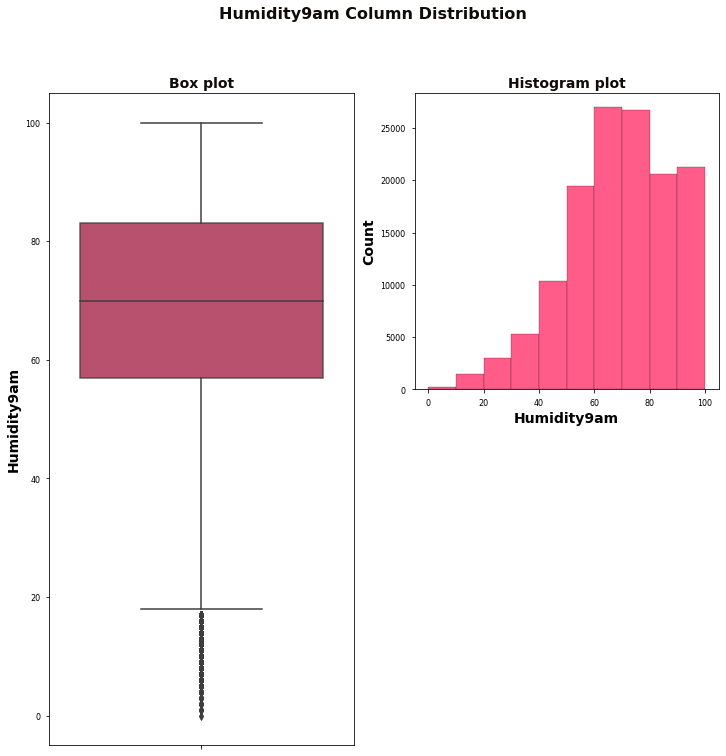

In [20]:
# --- figure
fig = plt.figure(figsize = (12,12))
fig.suptitle('Humidity9am Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Histogram
ax_1 = fig.add_subplot(2,2,2)

plt.hist(weather_df["Humidity9am"], edgecolor = black_grad[0], color = pink_grad[2])
plt.title("Histogram plot", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.xlabel("Humidity9am", fontsize = 14, fontweight ="bold", fontfamily = "sans-serif")
plt.ylabel("Count", fontsize = 14, fontweight = "bold", fontfamily = "sans-serif")

# --- Boxplot
ax_2 = fig.add_subplot(1,2,1)
sns.boxplot(data=weather_df, y=weather_df["Humidity9am"], boxprops=dict(alpha=0.8), linewidth=1.5,
           color = pink_grad[1])
plt.title("Box plot", fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
         color = black_grad[0])
plt.ylabel("Humidity9am", fontsize = 14, fontweight = "bold")


print("*" * 15)
print('\033[1m'+'.: Humidity9am :.' +'\033[0m')
print("*" * 15)

# 7. RainTomorrow Distribution based on MinTemp, MaxTemp

**************************************************************************************
.: RainTomorrow Distribution based on MinTemp, MaxTemp, WindGustSpeed, Pressure9am :.
**************************************************************************************


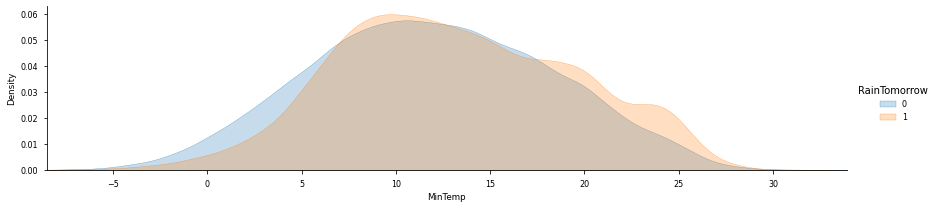

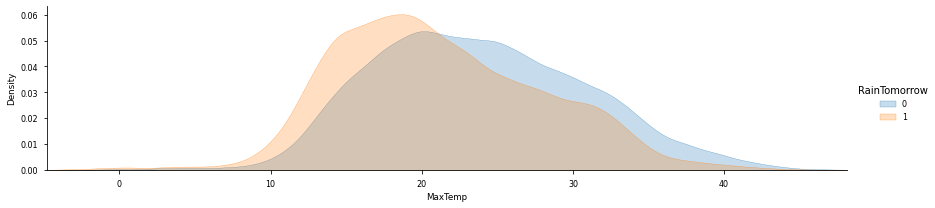

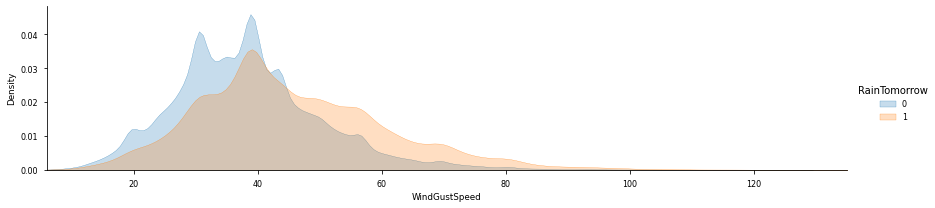

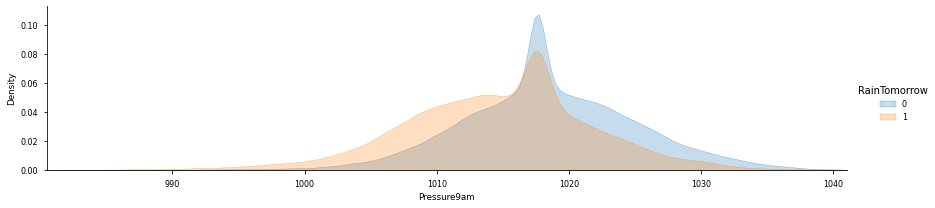

In [45]:
features = ["MinTemp", "MaxTemp", "WindGustSpeed", "Pressure9am"]

for feat in features:
    a = sns.FacetGrid(weather_df, hue = "RainTomorrow", aspect = 4)
    a.map(sns.kdeplot, feat, shade = True)
    a.set(xlim = (weather_df[feat].min(), weather_df[feat].max()))
    a.add_legend()
    
print("*" * 86)
print('\033[1m'+'.: RainTomorrow Distribution based on MinTemp, MaxTemp, WindGustSpeed, Pressure9am :.' +'\033[0m')
print("*" * 86)
    

********************************************
.: Correlation map of numerical variables :.
********************************************


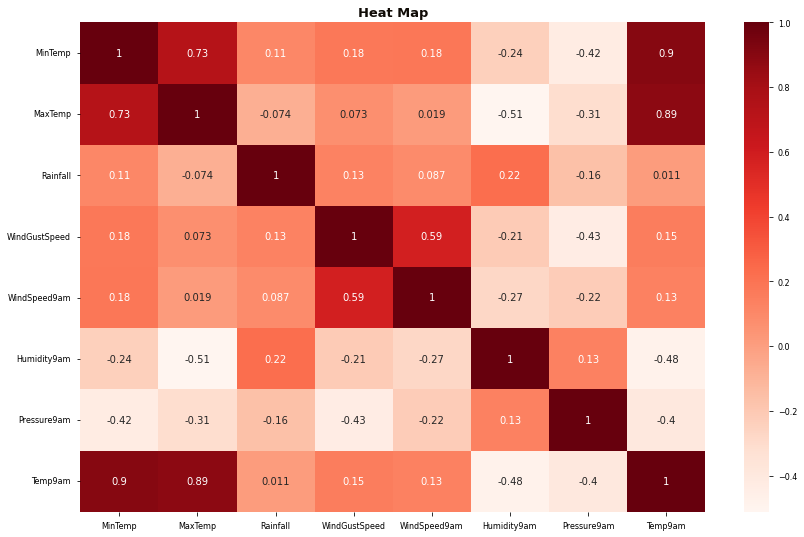

In [104]:
plt.figure(figsize = (14,9))
plt.title("Heat Map", fontsize = 13, fontweight = "bold", color = black_grad[0] )
sns.heatmap(weather_df[["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am",
                        "Humidity9am", "Pressure9am", "Temp9am"]].corr(), annot = True, cmap = "Reds")

print("*" * 44)
print('\033[1m'+'.: Correlation map of numerical variables :.' +'\033[0m')
print("*" * 44)

# 4. Data pre-processing

In [54]:
#code categorical data
categorical_code = ["RainToday", "RainTomorrow", "WindDir3pm", "WindDir9am", "WindGustDir", "Location"]

In [55]:
label = LabelEncoder()
for category in categorical_code:
    weather_df[category] = label.fit_transform(weather_df[category])

In [56]:
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [57]:
#We need to code Date as useful feature
# I am gonna extract the month from the date
weather_df["Month"] = weather_df["Date"].str.slice(5,7)
del weather_df["Date"]

In [58]:
# Double check cleaned data
weather_df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64

In [59]:
weather_df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,12
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,12
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,12
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,12


# 5. Training the model 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(weather_df.loc[:, weather_df.columns != 'RainTomorrow'], weather_df["RainTomorrow"],
                                                    train_size=0.75, random_state=1)

In [62]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Month
27481,34,11.3,30.1,0.0,9,39.0,8,2,6.0,20.0,69.0,36.0,1022.7,1019.5,19.9,29.1,0,11
95083,39,24.3,30.4,0.0,0,44.0,2,1,26.0,31.0,62.0,58.0,1009.6,1007.4,28.5,28.9,0,02
47677,9,0.9,24.4,0.0,6,35.0,7,3,6.0,17.0,63.0,20.0,1028.0,1022.5,9.9,23.1,0,10
59803,6,11.1,13.6,3.0,1,54.0,1,1,22.0,13.0,87.0,98.0,1008.4,1003.9,12.2,11.9,1,09
74114,25,15.3,36.6,0.0,8,54.0,8,11,7.0,28.0,48.0,15.0,1018.8,1017.2,22.1,34.4,0,02


In [63]:
y_train.head()

27481    0
95083    0
47677    0
59803    1
74114    0
Name: RainTomorrow, dtype: int64

In [64]:
X_train.shape

(101732, 18)

In [65]:
y_train.shape

(101732,)

In [66]:
X_test.shape

(33911, 18)

In [67]:
y_test.shape

(33911,)

# k- Nearest Neighbours

In [68]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [69]:
knn.score(X_test, y_test)

0.8340656424169148

In [78]:
# Adjusting the number of neighbours
score1 = []
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
    score1.append(knn.score(X_test, y_test))
KNNmax = round(max(score1),2)

print("*" * 40)
print('\033[1m'+f'.: Maximum accuracy for k-NN: {KNNmax}:.' +'\033[0m')
print("*" * 40)

**************************************************
.: Maximum accuracy for k-NN: 0.85:.
**************************************************


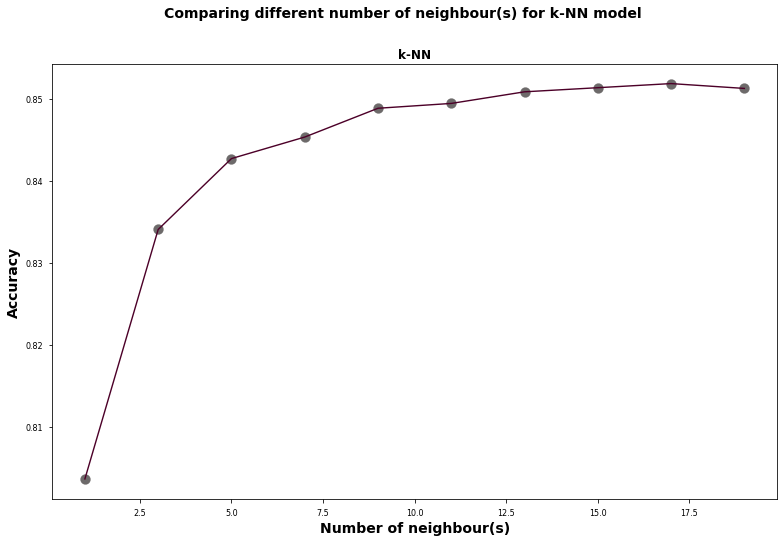

In [79]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different number of neighbour(s) for k-NN model", fontweight = "bold", fontsize = 14)
plt.title("k-NN", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("Number of neighbour(s)", fontweight = "bold", fontsize = 14)
plt.scatter(x = list(range(1,20,2)), y = score1, s = 100, color = black_grad[2])
plt.plot(list(range(1,20,2)), score1, color = purple_grad[0])

# Decision Tree

In [80]:
tree = DecisionTreeClassifier(random_state= 10).fit(X_train, y_train)

In [81]:
tree.score(X_test, y_test)

0.785674264987762

In [82]:
# Adjusting the number of max_depth
score2 = []
for i in range(1,20,2):
    tree = DecisionTreeClassifier(max_depth= i, random_state= 10).fit(X_train, y_train)
    score2.append(tree.score(X_test, y_test))
DTmax = round(max(score2),2)

print("*" * 47)
print('\033[1m'+f'.: Maximum accuracy for Decision Tree: {DTmax}:.' +'\033[0m')
print("*" * 47)

****************************************
.: Maximum accuracy for Decision Tree: 0.84:.
****************************************


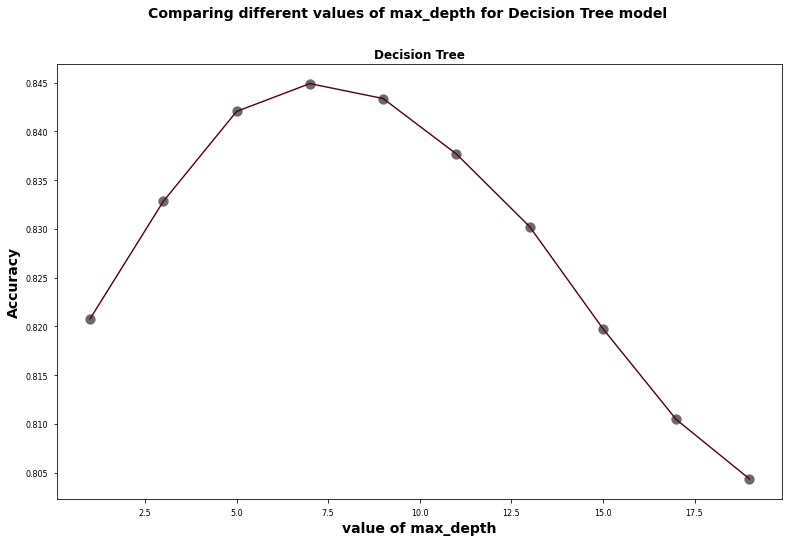

In [83]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different values of max_depth for Decision Tree model", fontweight = "bold", fontsize = 14)
plt.title("Decision Tree", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("value of max_depth", fontweight = "bold", fontsize = 14)
plt.scatter(x = list(range(1,20,2)), y = score2, s = 100, color = black_grad[2])
plt.plot(list(range(1,20,2)), score2, color = purple_grad[0])

# Random Forest

In [84]:
forest = RandomForestClassifier(random_state=10).fit(X_train, y_train)
forest.score(X_test, y_test)

0.8584530093479992

In [85]:
# --- Adjusting the number of estimators
score3 = []
for i in range(1,20,2):
    forest = RandomForestClassifier(n_estimators= i, random_state=10).fit(X_train, y_train)
    score3.append(forest.score(X_test, y_test))
RFmax = round(max(score3),2)

print("*" * 40)
print('\033[1m'+f'.: Maximum accuracy for Random Forest: {RFmax}:.' +'\033[0m')
print("*" * 40)

****************************************
.: Maximum accuracy for Random Forest: 0.85:.
****************************************


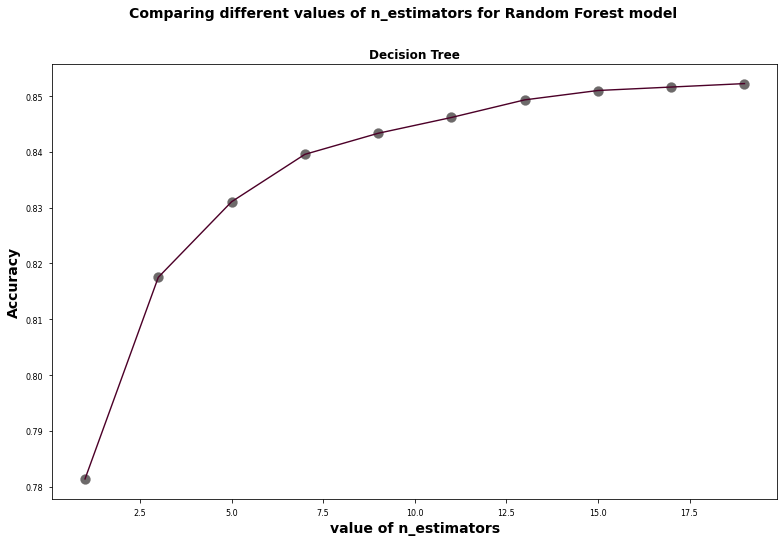

In [86]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different values of n_estimators for Random Forest model", fontweight = "bold", fontsize = 14)
plt.title("Decision Tree", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("value of n_estimators", fontweight = "bold", fontsize = 14)
plt.scatter(x = list(range(1,20,2)), y = score3, s = 100, color = black_grad[2])
plt.plot(list(range(1,20,2)), score3, color = purple_grad[0])

# Linear models

In [47]:
lin = LinearRegression().fit(X_train, y_train)
lin.score(X_test, y_test)

0.3152507836967574

## Ridge

In [87]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_test, y_test)

0.31525077694092085

In [88]:
score4 = []
alpha = [0.0001,0.001,0.01,0.1,1,10,100] #7
for alph in alpha:
    ridge = Ridge(alpha=alph).fit(X_train, y_train)
    score4.append(ridge.score(X_test, y_test))
RIDGEmax = round(max(score4),2)

print("*" * 40)
print('\033[1m'+f'.: Maximum accuracy for Ridge: {RIDGEmax}:.' +'\033[0m')
print("*" * 40)
    

****************************************
.: Maximum accuracy for Ridge: 0.32:.
****************************************


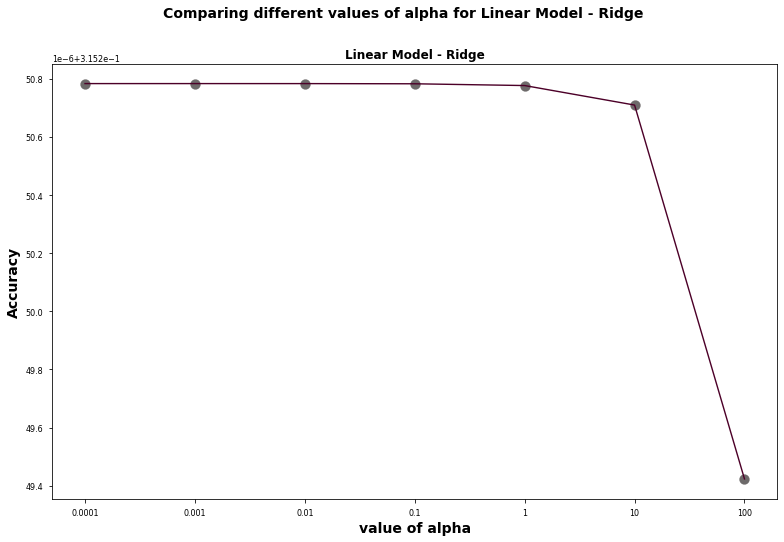

In [89]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different values of alpha for Linear Model - Ridge", fontweight = "bold", fontsize = 14)
plt.title("Linear Model - Ridge", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("value of alpha", fontweight = "bold", fontsize = 14)
plt.xticks(range(len(alpha)), alpha)
plt.scatter(x = range(len(alpha)), y = score4, s = 100, color = black_grad[2])
plt.plot(range(len(alpha)), score4, color = purple_grad[0])

# Lasso

In [90]:
las = Lasso().fit(X_train, y_train)
las.score(X_test, y_test)

0.2107831407752615

In [91]:
score5 = []
alpha = [0.0001,0.001,0.01,0.1,1,10,100] #7
for alph in alpha:
    lasso = Lasso(alpha=alph).fit(X_train, y_train)
    score5.append(lasso.score(X_test, y_test))
LASSOmax = round(max(score5),2)

print("*" * 40)
print('\033[1m'+f'.: Maximum accuracy for Lasso: {LASSOmax}:.' +'\033[0m')
print("*" * 40)

****************************************
.: Maximum accuracy for Lasso: 0.32:.
****************************************


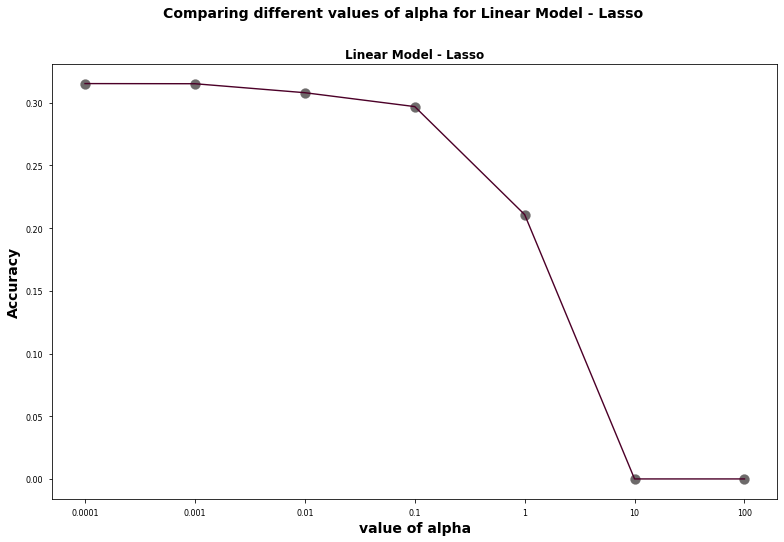

In [92]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different values of alpha for Linear Model - Lasso", fontweight = "bold", fontsize = 14)
plt.title("Linear Model - Lasso", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("value of alpha", fontweight = "bold", fontsize = 14)
plt.xticks(range(len(alpha)), alpha)
plt.scatter(x = range(len(alpha)), y = score5, s = 100, color = black_grad[2])
plt.plot(range(len(alpha)), score5, color = purple_grad[0])

# Logistic Regression

In [93]:
logreg = LogisticRegression(max_iter = 1000).fit(X_train, y_train)
logreg.score(X_test, y_test)

0.843620064285925

In [94]:
score6 = []
C_list = [0.0001,0.001,0.01,0.1,1,10,100] #7
for C in C_list:
    logreg = LogisticRegression(C=C, max_iter=10000).fit(X_train, y_train)
    score6.append(logreg.score(X_test, y_test))
LOGREGmax = round(max(score6),2)

print("*" * 55)
print('\033[1m'+f'.: Maximum accuracy for Logistic Regression: {LOGREGmax}:.' +'\033[0m')
print("*" * 55)

****************************************
.: Maximum accuracy for Logistic Regression: 0.84:.
****************************************


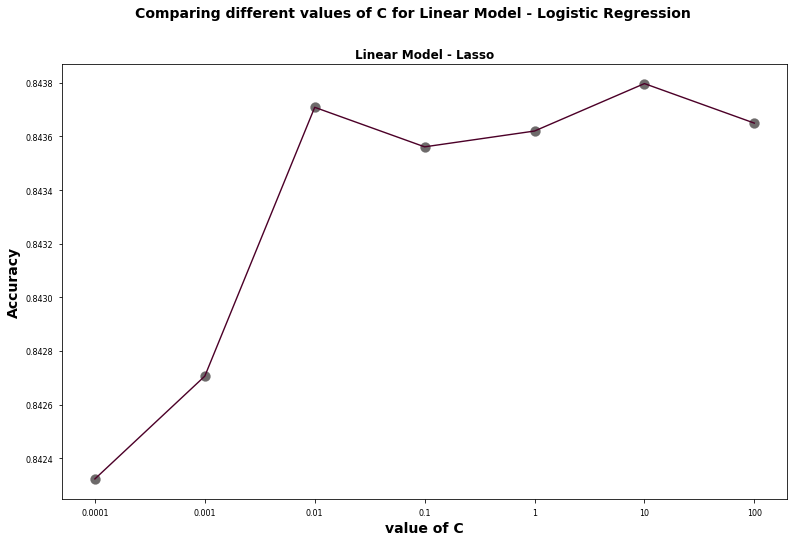

In [95]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different values of C for Linear Model - Logistic Regression", fontweight = "bold", fontsize = 14)
plt.title("Linear Model - Lasso", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("value of C", fontweight = "bold", fontsize = 14)
plt.xticks(range(len(alpha)), alpha)
plt.scatter(x = range(len(alpha)), y = score6, s = 100, color = black_grad[2])
plt.plot(range(len(alpha)), score6, color = purple_grad[0])

# Kernelized Support Vector Machines

In [96]:
lin_svm = LinearSVC().fit(X_train, y_train)
SVMmax = lin_svm.score(X_test, y_test)

print("*" * 55)
print('\033[1m'+f'.: Maximum accuracy for SVM: {SVMmax}:.' +'\033[0m')
print("*" * 55)

*******************************************************
.: Maximum accuracy for SVM: 0.7852909085547463:.
*******************************************************


c:\users\uzytkownik\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Deep learning 

In [39]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, max_iter=10000).fit(X_train, y_train)
MLPmax = mlp.score(X_test, y_test) # takes very long time 

print("*" * 55)
print('\033[1m'+f'.: Maximum accuracy for MLP: {MLPmax}:.' +'\033[0m')
print("*" * 55)

0.8451240010616025

# Gradient Boosting 

In [97]:
gbc = GradientBoostingClassifier(random_state=10).fit(X_train,y_train)
gbc.score(X_test, y_test)

0.8525847070272183

In [98]:
# Adjusting the value of max_depth
score7 = []
for i in range(1,5):
    gbc = GradientBoostingClassifier(max_depth= i, random_state= 10).fit(X_train, y_train)
    score7.append(gbc.score(X_test, y_test))
    
GBmax = round(max(score7),2)

print("*" * 55)
print('\033[1m'+f'.: Maximum accuracy for Gradient Boosting: {GBmax}:.' +'\033[0m')
print("*" * 55)

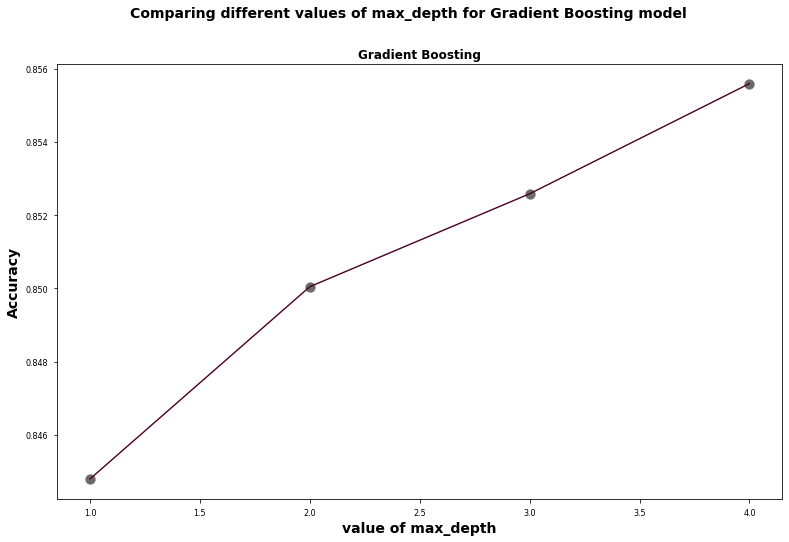

In [99]:
# --- Scatter plot with line connecting points
plt.figure(figsize = (13,8))
plt.suptitle("Comparing different values of max_depth for Gradient Boosting model", fontweight = "bold", fontsize = 14)
plt.title("Gradient Boosting", fontweight = "bold", fontsize = 12)
plt.ylabel("Accuracy", fontweight = "bold", fontsize = 14)
plt.xlabel("value of max_depth", fontweight = "bold", fontsize = 14)
plt.scatter(x = list(range(1,5)), y = score7, s = 100, color = black_grad[2])
plt.plot(list(range(1,5)), score7, color = purple_grad[0])

# 6. Model comparison

It can be observed that maximum accuracy is approximately 85 % for k-NN model, RandomForest, DecisionTree, Gradient Boosting, 